In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

### Data Preprocesssing

In [2]:
salary=pd.read_csv("Salary_Data.csv")
salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
salary.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [4]:
salary.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [5]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


#### Extracting Independent and dependent variables


In [6]:
# : is used to select all rows
x= salary.iloc[:, :-1].values# :-1 selects all columns except the last one. 
y= salary.iloc[:, 1].values# 1 selects the column at index 1

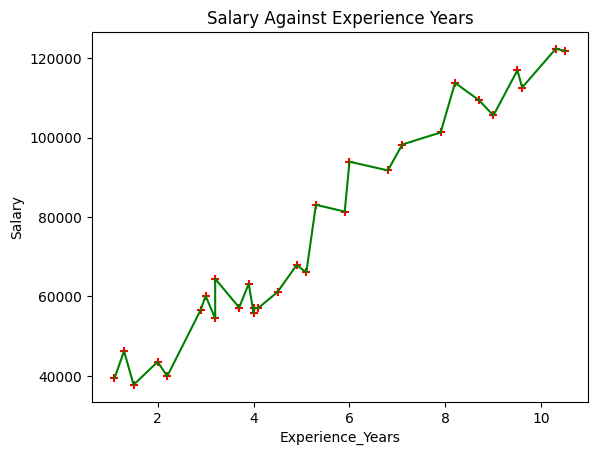

In [7]:
plt.scatter(x,y,color="red",marker="+")
plt.plot(x,y,color='green')
plt.xlabel("Experience_Years")
plt.ylabel("Salary")
plt.title("Salary Against Experience Years")
plt.show()

#### Splitting into training and test set

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0,shuffle=True)
#If you set shuffle to false, it takes the data as it is i.e from index 1-20.
#to avoid bias it is set default to true

In [9]:
y_train

array([101302.,  56642.,  66029.,  64445.,  61111., 113812.,  91738.,
        46205., 121872.,  60150.,  39891.,  81363.,  93940.,  57189.,
        54445., 105582.,  43525.,  39343.,  98273.,  67938.,  56957.])

#### Fitting Simple Linear Regression to Train set

In [18]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression().fit(x_train,y_train)

##### Model Evaluation

In [21]:
score = regressor.score(x_test, y_test)
print("R^2:", score)
#This means that about 97.4% of the variance in the dependent variable y can be explained by the independent variable x

R^2: 0.9740993407213511


In [20]:
y_pred=regressor.predict(x_test)
x_pred=regressor.predict(x_train)
print(y_pred)
print("----------------------------------------------------")
print(x_pred)

[ 40817.78327049 123188.08258899  65154.46261459  63282.41035735
 115699.87356004 108211.66453108 116635.89968866  64218.43648597
  76386.77615802]
----------------------------------------------------
[100723.45550213  53922.14907116  74514.72390079  56730.22745702
  68898.56712907 103531.53388799  90427.16808731  38945.73101325
 125060.13484623  54858.17519978  47369.96617082  82002.93292974
  82938.95905836  61410.35810011  56730.22745702 111019.74291694
  45497.91391358  37073.67875601  93235.24647317  72642.67164355
  64218.43648597]


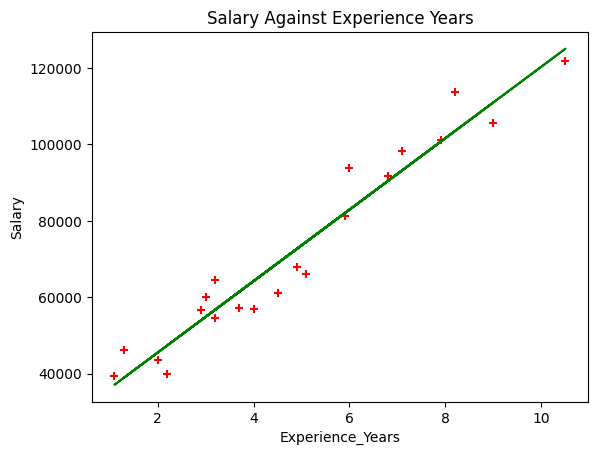

In [13]:
plt.scatter(x_train,y_train,color="red",marker="+")
plt.plot(x_train,x_pred,color='green')
plt.xlabel("Experience_Years")
plt.ylabel("Salary")
plt.title("Salary Against Experience Years")
plt.show()

#### Visualizing Test Set

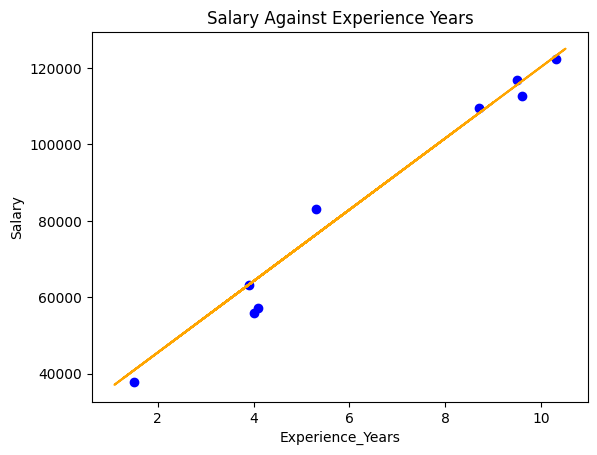

In [14]:
plt.scatter(x_test,y_test,color="blue")
plt.plot(x_train,x_pred,color="orange")
plt.xlabel("Experience_Years")
plt.ylabel("Salary")
plt.title("Salary Against Experience Years")
plt.show()

In [15]:
import sklearn.metrics as sm
# Compute performance metrics
print("Linear regressor performance:")
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Linear regressor performance:
R2 score = 0.97


In [16]:
import sklearn.metrics as sm

print("Linear regressor performance:")
mse = sm.mean_squared_error(y_test, y_pred)
print("Mean Squared Error =", round(mse, 2))

Linear regressor performance:
Mean Squared Error = 23370078.8


In [17]:


# Compute SSE, SST, SSR
errors = y_test - y_pred
sse = np.sum(errors**2)
sst = np.sum((y_test - np.mean(y_test))**2)
ssr = sst - sse

# Compute R-squared
r_squared = ssr / sst

# Compute centroid
centroid = np.mean(y_test)

# Print the results
print("SSE:", sse)
print("SST:", sst)
print("SSR:", ssr)
print("R-squared:", r_squared)
print("Centroid:", centroid)

SSE: 210330709.20749673
SST: 8120670093.555555
SSR: 7910339384.348059
R-squared: 0.9740993407213511
Centroid: 84259.77777777778
